In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\LENOVO\Desktop\Python\github\diabetes\dataset\archive\diabetes.xlsx')
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
data=data.dropna();#if there are NaN values, the row will have been removed.
X=data.iloc[:,0:8].values
y=data.iloc[:,-1].values

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [6]:
#finding the optimum k value for KNN
maximum_neighbors_value=0
neighbors_List=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score=accuracy_score(y_test, y_pred).tolist()
    print(acc_score)
    neighbors_List.append(acc_score)
    if acc_score>maximum_neighbors_value:
        maximum_neighbors_value=acc_score
print("Maximum neighbors value:",maximum_neighbors_value)

0.7056277056277056
0.7359307359307359
0.7619047619047619
0.7402597402597403
0.7619047619047619
0.7792207792207793
0.7619047619047619
0.7575757575757576
0.7445887445887446
0.7532467532467533
0.7705627705627706
0.7662337662337663
0.7619047619047619
0.7705627705627706
0.7575757575757576
0.7619047619047619
0.7705627705627706
0.7532467532467533
0.7662337662337663
0.7662337662337663
0.7705627705627706
0.7705627705627706
0.7532467532467533
0.7575757575757576
0.7575757575757576
0.7575757575757576
0.7619047619047619
0.7575757575757576
0.7619047619047619
0.7835497835497836
Maximum neighbors value: 0.7835497835497836


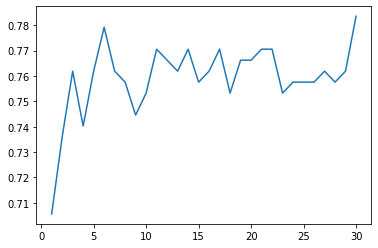

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),neighbors_List)

In [8]:
for i in range(0,len(neighbors_List)):
    if maximum_neighbors_value==neighbors_List[i]:
        optimum_k=i
print("Optimum k:",optimum_k)

Optimum k: 29


In [9]:
#Original dataset is splitted into 10 equal subsamples.
kf = KFold(n_splits=10,random_state=None,shuffle=False)
kf_scores=[]
maximum_kf=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn=KNeighborsClassifier(n_neighbors=optimum_k+1,metric="minkowski",p=2)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score=accuracy_score(y_test, y_pred).tolist()
    kf_scores.append(acc_score)
    print(acc_score)
    if acc_score>maximum_kf:
        maximum_kf=acc_score
print("Maximum K Fold Value:",maximum_kf)

0.7012987012987013
0.7662337662337663
0.6753246753246753
0.5974025974025974
0.7272727272727273
0.7532467532467533
0.7922077922077922
0.8181818181818182
0.7894736842105263
0.7368421052631579
Maximum K Fold Value: 0.8181818181818182


In [10]:
#The most appropriate subsample is selected. 
for i in range(0,len(kf_scores)):
    if maximum_kf==kf_scores[i]:
        optimum_kf=i       
print("Optimum K Fold:",optimum_kf)

Optimum K Fold: 7


In [11]:
#Retraining using the most appropriate subsample.
t=0
for train_index, test_index in kf.split(X):
    if t==optimum_kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn=KNeighborsClassifier(n_neighbors=optimum_k+1,metric="minkowski",p=2)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        acc_score=accuracy_score(y_test, y_pred)
        print("The best accuracy value:",acc_score)
        break
    t=t+1

The best accuracy value: 0.8181818181818182
